Task-1: Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Step 1: Import Required Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Step 2: Load Dataset


In [121]:
train_data=pd.read_csv("C:/Users/Shagufta Umme/Desktop/House Price Prediction/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("C:/Users/Shagufta Umme/Desktop/House Price Prediction/house-prices-advanced-regression-techniques/test.csv")

Step 3: Dataset Exploration

In [122]:
print("Missing values:\n", train_data.isnull().sum().sort_values(ascending=False).head(10))
print("Duplicate rows:", train_data.duplicated().sum())

Missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64
Duplicate rows: 0


In [123]:
train_data.shape

(1460, 81)

In [124]:
test_data.shape

(1459, 80)

In [125]:
train_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [126]:
# Handle missing values
for column in train_data.columns:
    if train_data [column].dtype=='object':
        #Fill missing values with the mode for categorical features
        train_data[column].fillna(train_data[column].mode() [0],inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode() [0],inplace=True)
    else:
        #Fill missing values with the mean for numeric features
        train_data[column].fillna(train_data[column].mean(),inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(),inplace=True)

C:\Users\Shagufta Umme\AppData\Local\Temp\ipykernel_9584\566618218.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mean(),inplace=True)
C:\Users\Shagufta Umme\AppData\Local\Temp\ipykernel_9584\566618218.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [127]:
print(train_data.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

Step 4: Feature Engineering

In [128]:
train_data["TotalBath"] = train_data["FullBath"] + 0.5 * train_data["HalfBath"]
test_data["TotalBath"]  = test_data["FullBath"] + 0.5 * test_data["HalfBath"]


In [129]:
#Select features
features=['GrLivArea', 'BedroomAbvGr', 'TotalBath']
X=train_data[features]
y=train_data['SalePrice']

Step 5: Exploratory Data Analysis (EDA)

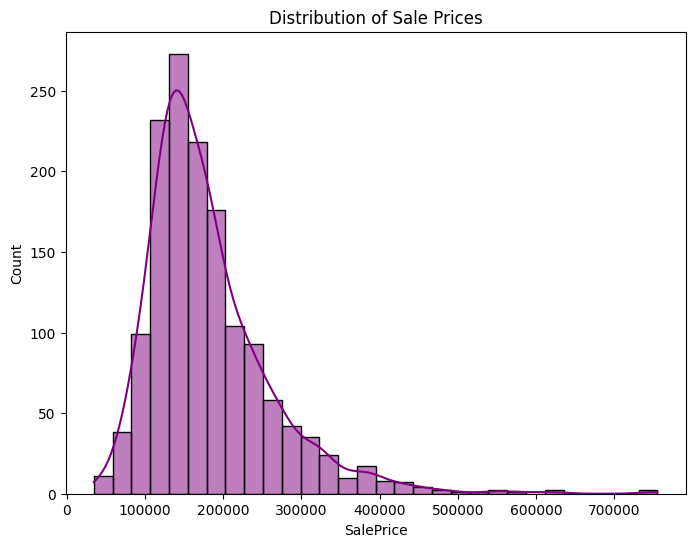

In [130]:
plt.figure(figsize=(8,6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30, color="purple")
plt.title("Distribution of Sale Prices")
plt.show()

Top correlated features with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
TotalBath       0.597966
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


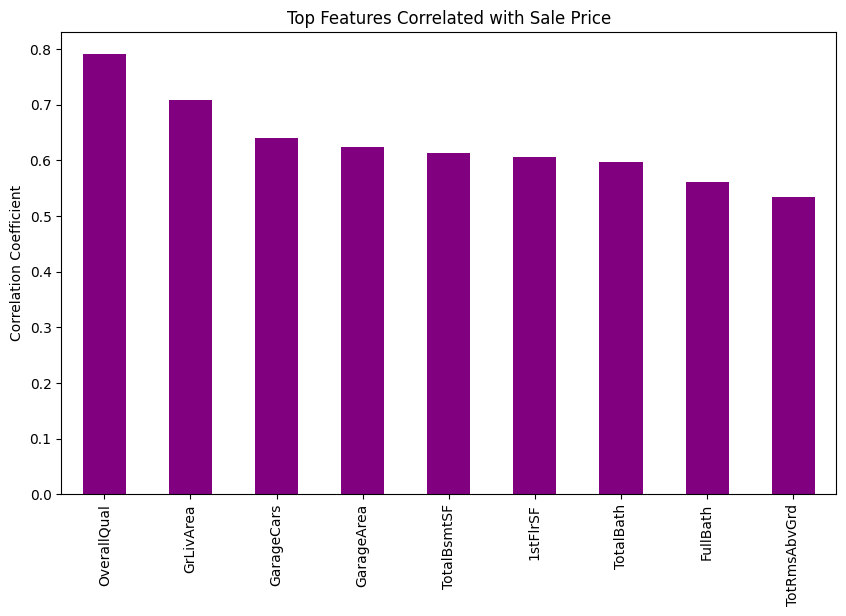

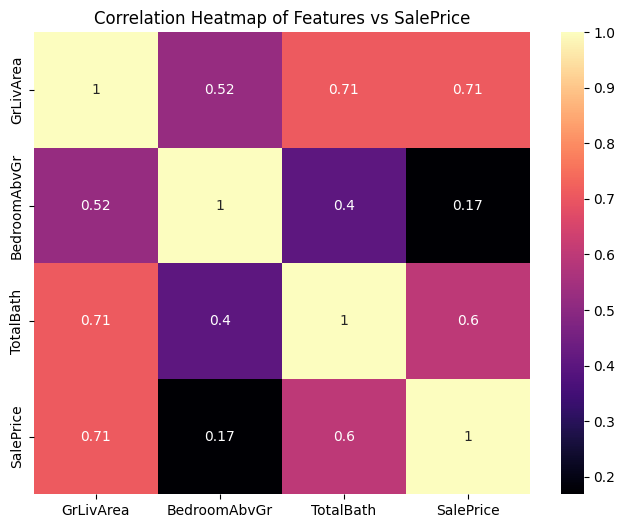

In [131]:
# 2. Top correlated features with SalePrice
corr_matrix = train_data.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("Top correlated features with SalePrice:\n", top_corr)

plt.figure(figsize=(10,6))
top_corr.drop('SalePrice').plot(kind='bar', color="purple")
plt.title("Top Features Correlated with Sale Price")
plt.ylabel("Correlation Coefficient")
plt.show()
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_data[features + ['SalePrice']].corr(), annot=True, cmap="magma")
plt.title("Correlation Heatmap of Features vs SalePrice")
plt.show()


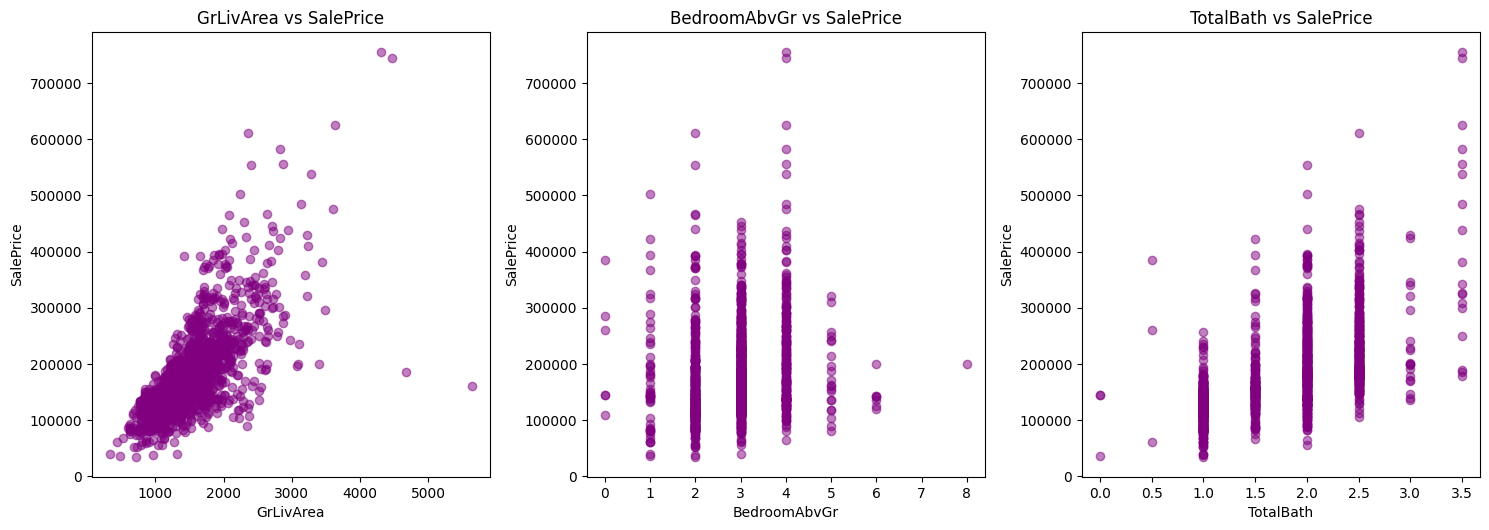

In [132]:
fig,axes=plt.subplots(2,3,figsize=(15,10))
axes=axes.flatten()

for i, col in enumerate(features):
    axes[i].scatter(train_data[col], train_data['SalePrice'], alpha=0.5, color="purple")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")
    axes[i].set_title(f"{col} vs SalePrice")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Step 6: Train/Test Split and Model Training

In [133]:
#Split the training data for validation
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred = model.predict(X_val)

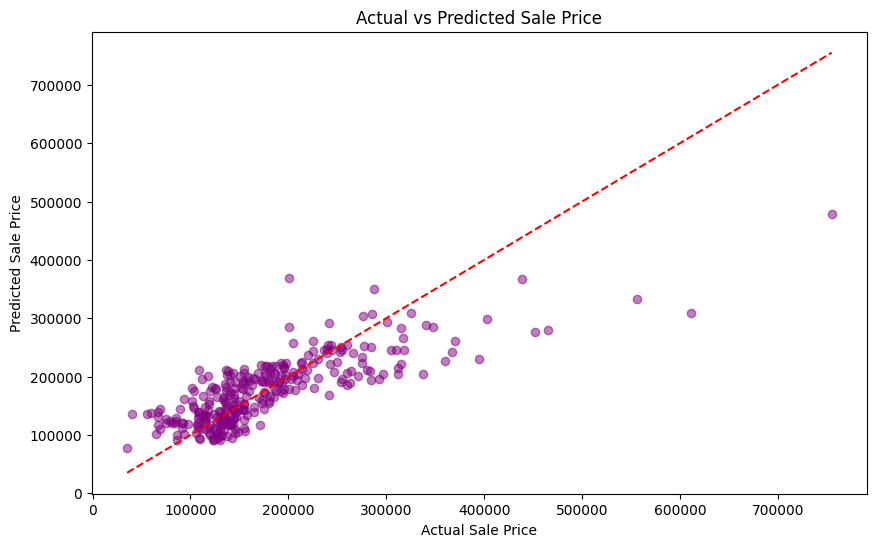

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5, color='purple')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()

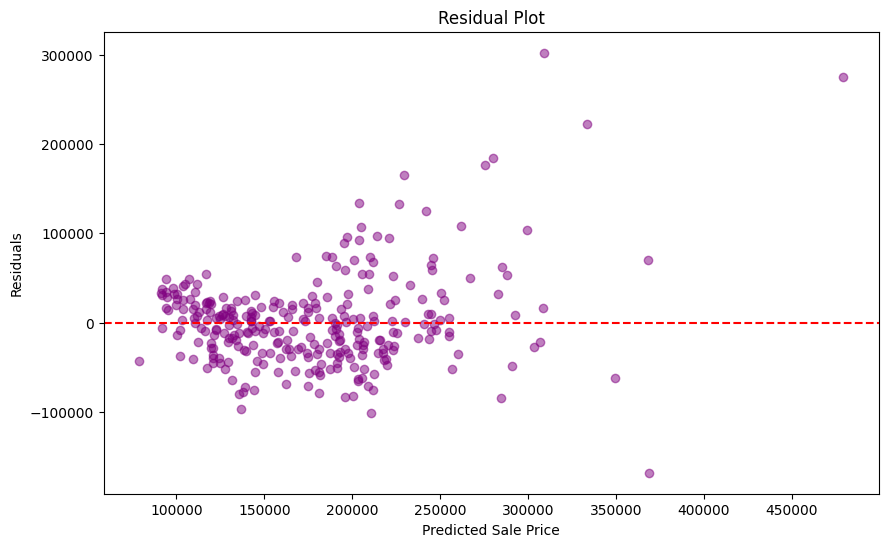

In [136]:
residuals=y_val-y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

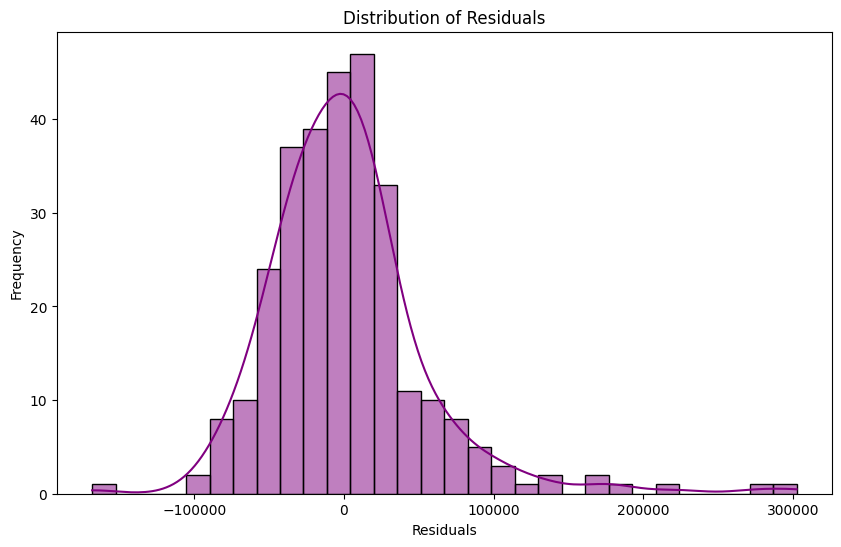

In [137]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

Step 7: Example Prediction

In [139]:
example=pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'TotalBath': [2 + 0.5*1]
})
example_prediction=model.predict(example)
print (f'Example Prediction: ${example_prediction[0]:,.2f}')

Example Prediction: $245,907.79


Step 8: Predict on Test Data

In [140]:
#Prepare the test data and make predictions
X_test=test_data[features]
test_predictions=model.predict (X_test)


Step 9: Save Submission

In [141]:
#Save predictions
submission=pd.DataFrame ({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")

✅ Submission file saved as 'submission.csv'
